In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
from algorithms.QLearning import QLearningAgent
from utils import QLearningTrainer, Tester


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/jovan/miniconda3/envs/reinforcement-learning/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/jovan/miniconda3/envs/reinforcement-learning/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/jovan/miniconda3/envs/reinforcement-learning/lib/python3.11/site-packages/i

In [2]:
# Initialize Environment
env = gym.make("Taxi-v3")

In [3]:
agent = QLearningAgent(
action_space=env.action_space,
observation_space=env.observation_space,
eps0=1.0,
eps_min=0.01,
eps_decay=2500,
learning_rate=0.1,
discount_factor=0.999
)

In [4]:
trainer = QLearningTrainer(env=env, agent=agent, save_path="./weights", save_rate=500)

In [5]:
num_episodes = 5000
trainer.train(num_episodes)

Model saved to ./weights/taxi_qtable_0.npy
Model saved to ./weights/taxi_qtable_500.npy
Episode 1000 completed
Model saved to ./weights/taxi_qtable_1000.npy
Model saved to ./weights/taxi_qtable_1500.npy
Episode 2000 completed
Model saved to ./weights/taxi_qtable_2000.npy
Model saved to ./weights/taxi_qtable_2500.npy
Episode 3000 completed
Model saved to ./weights/taxi_qtable_3000.npy
Model saved to ./weights/taxi_qtable_3500.npy
Episode 4000 completed
Model saved to ./weights/taxi_qtable_4000.npy
Model saved to ./weights/taxi_qtable_4500.npy
Episode 5000 completed


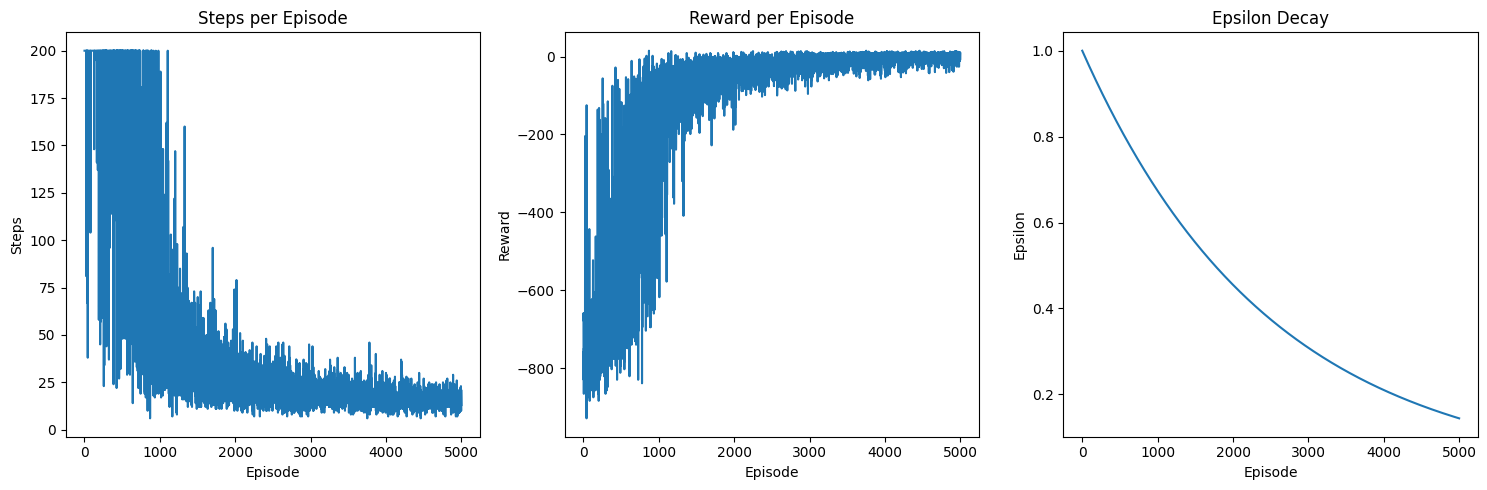

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(trainer.training_history["steps"])
plt.title("Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.subplot(132)
plt.plot(trainer.training_history["reward"])
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.subplot(133)
plt.plot(trainer.training_history["epsilon"])
plt.title("Epsilon Decay")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.tight_layout()
plt.show()

In [7]:
def run_trained_agent(env, agent, num_episodes=400):
  rewards_arr = []
  steps_arr = []
  agent.set_exploit()  # Set agent to exploit mode

  for i in range(num_episodes):
      state, _ = env.reset()
      terminated = False
      truncated = False
      steps = 0
      episode_reward = 0

      while not terminated and not truncated:
          action = agent.select_action(state)
          next_state, reward, terminated, truncated, _ = env.step(action)
          episode_reward += reward
          state = next_state
          steps += 1

      print(f"Episode: {i + 1}/{num_episodes}, Steps: {steps}, Reward: {episode_reward}")
      rewards_arr.append(episode_reward)
      steps_arr.append(steps)

  print(f"Average Reward: {np.mean(rewards_arr):.2f}, Average Steps: {np.mean(steps_arr):.2f}")
  print(f"Standard Deviation Reward: {np.std(rewards_arr):.2f}, Standard Deviation Steps: {np.std(steps_arr):.2f}")

  # Plot reward distribution
  plt.figure(figsize=(10, 5))
  plt.hist(rewards_arr, bins=20)
  plt.title("Reward Distribution")
  plt.xlabel("Reward")
  plt.ylabel("Frequency")
  plt.show()

Episode: 1/400, Steps: 12, Reward: 9
Episode: 2/400, Steps: 11, Reward: 10
Episode: 3/400, Steps: 16, Reward: 5
Episode: 4/400, Steps: 14, Reward: 7
Episode: 5/400, Steps: 12, Reward: 9
Episode: 6/400, Steps: 11, Reward: 10
Episode: 7/400, Steps: 12, Reward: 9
Episode: 8/400, Steps: 15, Reward: 6
Episode: 9/400, Steps: 13, Reward: 8
Episode: 10/400, Steps: 14, Reward: 7
Episode: 11/400, Steps: 15, Reward: 6
Episode: 12/400, Steps: 16, Reward: 5
Episode: 13/400, Steps: 12, Reward: 9
Episode: 14/400, Steps: 9, Reward: 12
Episode: 15/400, Steps: 13, Reward: 8
Episode: 16/400, Steps: 14, Reward: 7
Episode: 17/400, Steps: 15, Reward: 6
Episode: 18/400, Steps: 11, Reward: 10
Episode: 19/400, Steps: 13, Reward: 8
Episode: 20/400, Steps: 14, Reward: 7
Episode: 21/400, Steps: 9, Reward: 12
Episode: 22/400, Steps: 16, Reward: 5
Episode: 23/400, Steps: 13, Reward: 8
Episode: 24/400, Steps: 12, Reward: 9
Episode: 25/400, Steps: 15, Reward: 6
Episode: 26/400, Steps: 14, Reward: 7
Episode: 27/400, S

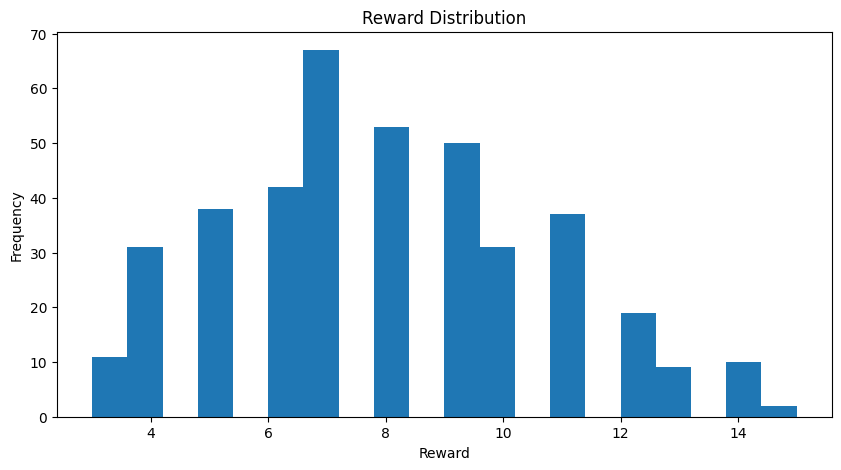

In [8]:
run_trained_agent(env, agent)


Testing model from episode 0
Model loaded from ./weights/taxi_qtable_0.npy
Episode: 1/400, Steps: 200, Reward: -200
Episode: 2/400, Steps: 200, Reward: -200
Episode: 3/400, Steps: 200, Reward: -200
Episode: 4/400, Steps: 200, Reward: -200
Episode: 5/400, Steps: 200, Reward: -200
Episode: 6/400, Steps: 200, Reward: -200
Episode: 7/400, Steps: 200, Reward: -200
Episode: 8/400, Steps: 200, Reward: -200
Episode: 9/400, Steps: 200, Reward: -200
Episode: 10/400, Steps: 200, Reward: -200
Episode: 11/400, Steps: 200, Reward: -200
Episode: 12/400, Steps: 200, Reward: -200
Episode: 13/400, Steps: 200, Reward: -200
Episode: 14/400, Steps: 200, Reward: -200
Episode: 15/400, Steps: 200, Reward: -200
Episode: 16/400, Steps: 200, Reward: -200
Episode: 17/400, Steps: 200, Reward: -200
Episode: 18/400, Steps: 200, Reward: -200
Episode: 19/400, Steps: 200, Reward: -200
Episode: 20/400, Steps: 200, Reward: -200
Episode: 21/400, Steps: 200, Reward: -200
Episode: 22/400, Steps: 200, Reward: -200
Episode: 

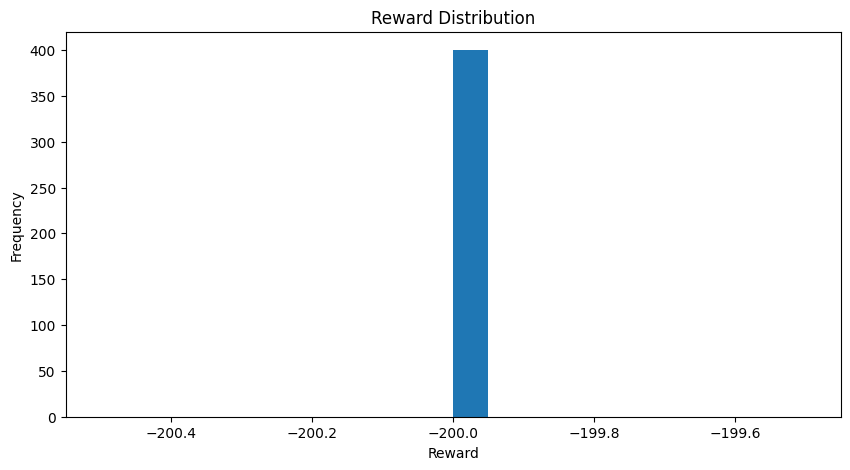


Testing model from episode 1000
Model loaded from ./weights/taxi_qtable_1000.npy
Episode: 1/400, Steps: 200, Reward: -200
Episode: 2/400, Steps: 7, Reward: 14
Episode: 3/400, Steps: 200, Reward: -200
Episode: 4/400, Steps: 200, Reward: -200
Episode: 5/400, Steps: 200, Reward: -200
Episode: 6/400, Steps: 13, Reward: 8
Episode: 7/400, Steps: 11, Reward: 10
Episode: 8/400, Steps: 10, Reward: 11
Episode: 9/400, Steps: 200, Reward: -200
Episode: 10/400, Steps: 10, Reward: 11
Episode: 11/400, Steps: 11, Reward: 10
Episode: 12/400, Steps: 10, Reward: 11
Episode: 13/400, Steps: 15, Reward: 6
Episode: 14/400, Steps: 12, Reward: 9
Episode: 15/400, Steps: 9, Reward: 12
Episode: 16/400, Steps: 10, Reward: 11
Episode: 17/400, Steps: 200, Reward: -200
Episode: 18/400, Steps: 9, Reward: 12
Episode: 19/400, Steps: 200, Reward: -200
Episode: 20/400, Steps: 8, Reward: 13
Episode: 21/400, Steps: 14, Reward: 7
Episode: 22/400, Steps: 200, Reward: -200
Episode: 23/400, Steps: 11, Reward: 10
Episode: 24/40

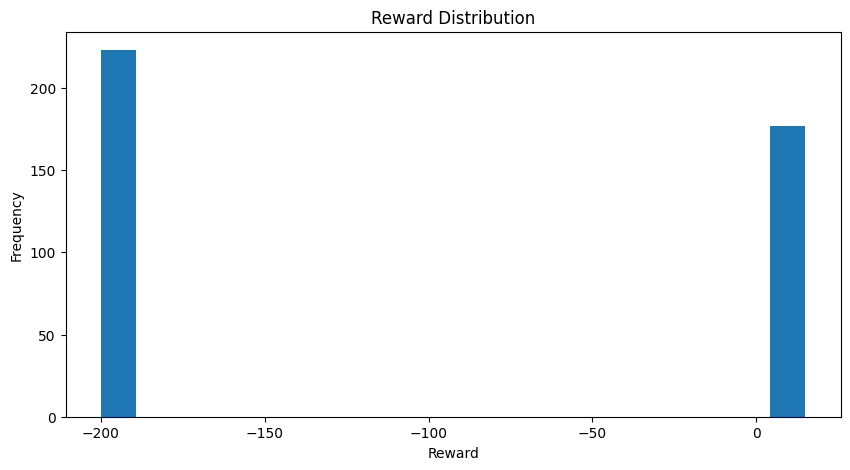


Testing model from episode 2000
Model loaded from ./weights/taxi_qtable_2000.npy
Episode: 1/400, Steps: 12, Reward: 9
Episode: 2/400, Steps: 10, Reward: 11
Episode: 3/400, Steps: 8, Reward: 13
Episode: 4/400, Steps: 6, Reward: 15
Episode: 5/400, Steps: 17, Reward: 4
Episode: 6/400, Steps: 11, Reward: 10
Episode: 7/400, Steps: 12, Reward: 9
Episode: 8/400, Steps: 16, Reward: 5
Episode: 9/400, Steps: 12, Reward: 9
Episode: 10/400, Steps: 13, Reward: 8
Episode: 11/400, Steps: 16, Reward: 5
Episode: 12/400, Steps: 11, Reward: 10
Episode: 13/400, Steps: 11, Reward: 10
Episode: 14/400, Steps: 14, Reward: 7
Episode: 15/400, Steps: 14, Reward: 7
Episode: 16/400, Steps: 10, Reward: 11
Episode: 17/400, Steps: 11, Reward: 10
Episode: 18/400, Steps: 15, Reward: 6
Episode: 19/400, Steps: 12, Reward: 9
Episode: 20/400, Steps: 14, Reward: 7
Episode: 21/400, Steps: 13, Reward: 8
Episode: 22/400, Steps: 12, Reward: 9
Episode: 23/400, Steps: 11, Reward: 10
Episode: 24/400, Steps: 13, Reward: 8
Episode:

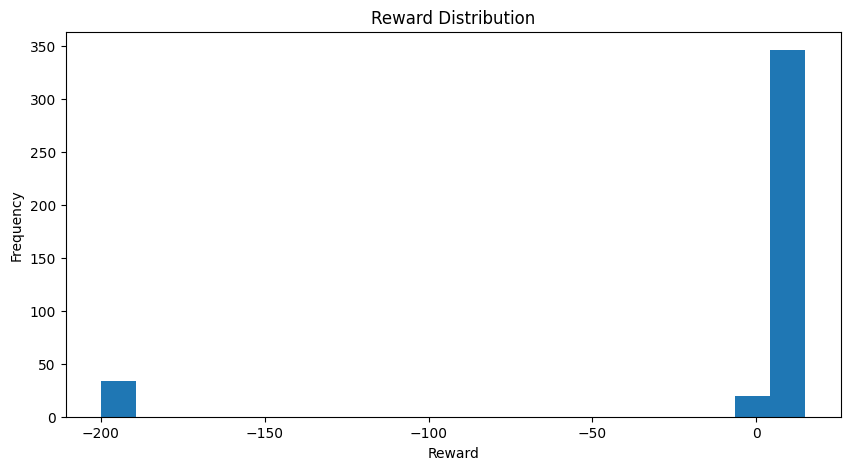


Testing model from episode 3000
Model loaded from ./weights/taxi_qtable_3000.npy
Episode: 1/400, Steps: 200, Reward: -200
Episode: 2/400, Steps: 9, Reward: 12
Episode: 3/400, Steps: 12, Reward: 9
Episode: 4/400, Steps: 11, Reward: 10
Episode: 5/400, Steps: 12, Reward: 9
Episode: 6/400, Steps: 17, Reward: 4
Episode: 7/400, Steps: 9, Reward: 12
Episode: 8/400, Steps: 14, Reward: 7
Episode: 9/400, Steps: 13, Reward: 8
Episode: 10/400, Steps: 12, Reward: 9
Episode: 11/400, Steps: 12, Reward: 9
Episode: 12/400, Steps: 15, Reward: 6
Episode: 13/400, Steps: 12, Reward: 9
Episode: 14/400, Steps: 11, Reward: 10
Episode: 15/400, Steps: 11, Reward: 10
Episode: 16/400, Steps: 16, Reward: 5
Episode: 17/400, Steps: 13, Reward: 8
Episode: 18/400, Steps: 14, Reward: 7
Episode: 19/400, Steps: 15, Reward: 6
Episode: 20/400, Steps: 11, Reward: 10
Episode: 21/400, Steps: 9, Reward: 12
Episode: 22/400, Steps: 11, Reward: 10
Episode: 23/400, Steps: 12, Reward: 9
Episode: 24/400, Steps: 17, Reward: 4
Episod

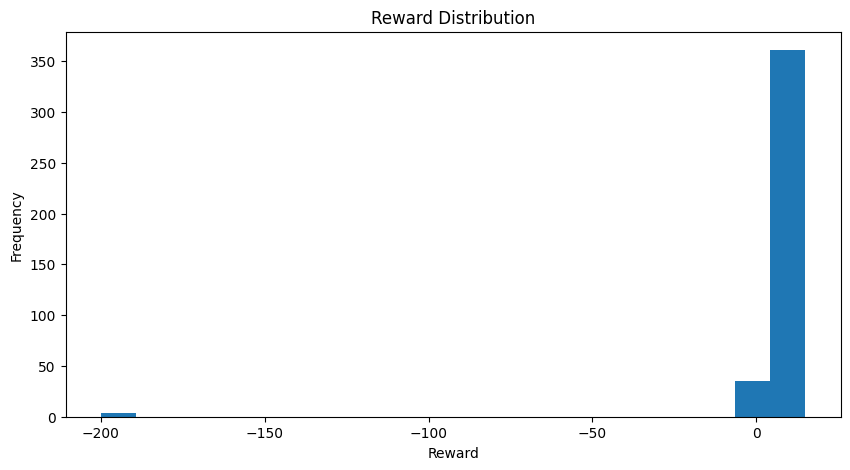


Testing model from episode 4000
Model loaded from ./weights/taxi_qtable_4000.npy
Episode: 1/400, Steps: 16, Reward: 5
Episode: 2/400, Steps: 16, Reward: 5
Episode: 3/400, Steps: 12, Reward: 9
Episode: 4/400, Steps: 15, Reward: 6
Episode: 5/400, Steps: 14, Reward: 7
Episode: 6/400, Steps: 10, Reward: 11
Episode: 7/400, Steps: 16, Reward: 5
Episode: 8/400, Steps: 10, Reward: 11
Episode: 9/400, Steps: 12, Reward: 9
Episode: 10/400, Steps: 12, Reward: 9
Episode: 11/400, Steps: 12, Reward: 9
Episode: 12/400, Steps: 15, Reward: 6
Episode: 13/400, Steps: 11, Reward: 10
Episode: 14/400, Steps: 14, Reward: 7
Episode: 15/400, Steps: 12, Reward: 9
Episode: 16/400, Steps: 17, Reward: 4
Episode: 17/400, Steps: 18, Reward: 3
Episode: 18/400, Steps: 13, Reward: 8
Episode: 19/400, Steps: 16, Reward: 5
Episode: 20/400, Steps: 12, Reward: 9
Episode: 21/400, Steps: 12, Reward: 9
Episode: 22/400, Steps: 12, Reward: 9
Episode: 23/400, Steps: 12, Reward: 9
Episode: 24/400, Steps: 10, Reward: 11
Episode: 25

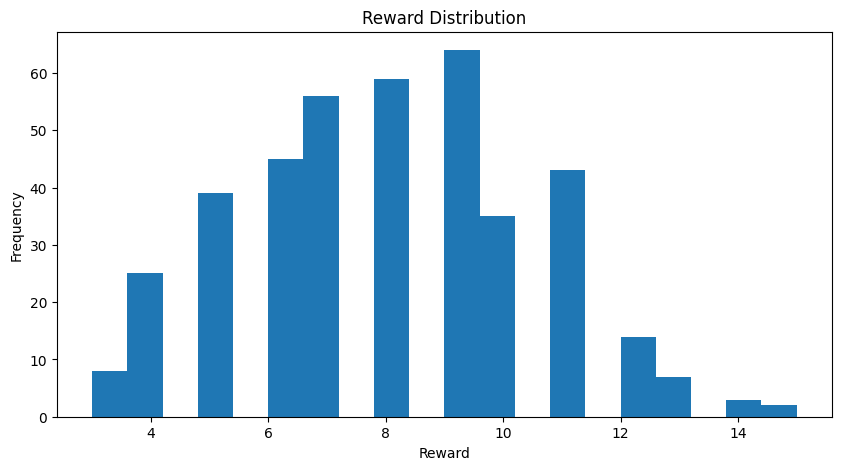


Testing model from episode 4500
Model loaded from ./weights/taxi_qtable_4500.npy
Episode: 1/400, Steps: 13, Reward: 8
Episode: 2/400, Steps: 11, Reward: 10
Episode: 3/400, Steps: 14, Reward: 7
Episode: 4/400, Steps: 13, Reward: 8
Episode: 5/400, Steps: 11, Reward: 10
Episode: 6/400, Steps: 13, Reward: 8
Episode: 7/400, Steps: 11, Reward: 10
Episode: 8/400, Steps: 15, Reward: 6
Episode: 9/400, Steps: 14, Reward: 7
Episode: 10/400, Steps: 13, Reward: 8
Episode: 11/400, Steps: 14, Reward: 7
Episode: 12/400, Steps: 13, Reward: 8
Episode: 13/400, Steps: 17, Reward: 4
Episode: 14/400, Steps: 7, Reward: 14
Episode: 15/400, Steps: 14, Reward: 7
Episode: 16/400, Steps: 15, Reward: 6
Episode: 17/400, Steps: 12, Reward: 9
Episode: 18/400, Steps: 17, Reward: 4
Episode: 19/400, Steps: 10, Reward: 11
Episode: 20/400, Steps: 16, Reward: 5
Episode: 21/400, Steps: 16, Reward: 5
Episode: 22/400, Steps: 15, Reward: 6
Episode: 23/400, Steps: 13, Reward: 8
Episode: 24/400, Steps: 13, Reward: 8
Episode: 25

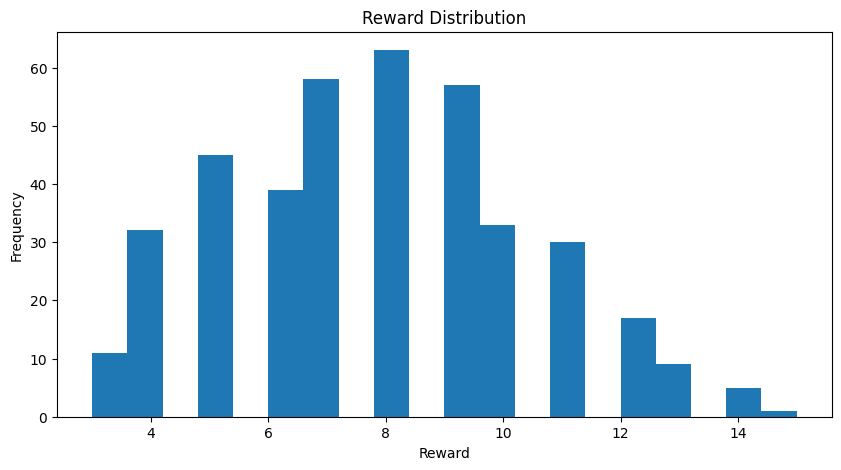

In [10]:
episodes_to_test = [0, 1000, 2000, 3000, 4000, 4500]
for episode in episodes_to_test:
  print(f"\nTesting model from episode {episode}")
  test_agent = QLearningAgent(
  action_space=env.action_space,
  observation_space=env.observation_space
  )
  test_agent.load_model(f"./weights/taxi_qtable_{episode}.npy")
  run_trained_agent(env, test_agent)